# Dataset Definition

The dataset related to red variants of the Portuguese “Vinho Verde” wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

We will take into account various input features like **fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol**. Based on these features we will predict the quality of the wine.

# Import Libraries and Load Dataset

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:

from google.colab import files
uploaded = files.upload()
#import io
#df2 = pd.read_csv(io.BytesIO(uploaded['Filename.csv']))
import io
# making data frame from csv file
#data = pd.read_csv("nba.csv", index_col ="Name")
dataset=pd.read_csv(io.BytesIO(uploaded['RedWine.csv']))

Saving RedWine.csv to RedWine.csv


# Dataset Exploration

In [3]:
print(dataset.shape)
dataset.describe()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Let us clean our data little bit, So first check which are the columns the contains NaN values in it 

In [4]:
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In case for any column you find True result, then remove all the null values from that column using below code

In [5]:
dataset = dataset.fillna(method='ffill')
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Divide the data into “attributes” and “labels”. X variable contains all the attributes/features and y variable contains labels.

In [0]:
X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']]
y = dataset['quality']

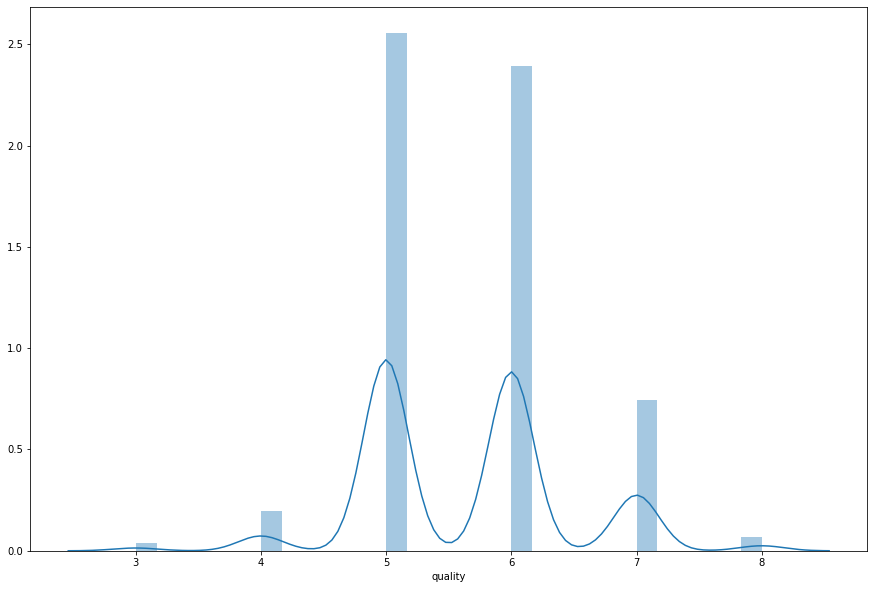

In [7]:
#Let's check the average value of the “quality” column
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['quality'])

# Training and Test Datasets

Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
The test_size variable is where we actually specify the proportion of the test set.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [10]:
print(X_train)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
642             9.9             0.540         0.45  ...  3.39       0.62      9.4
679            10.8             0.260         0.45  ...  3.13       0.54      9.6
473             9.9             0.350         0.55  ...  3.26       0.79     10.6
390             5.6             0.850         0.05  ...  3.56       0.82     12.9
1096            6.6             0.725         0.09  ...  3.35       0.49     10.8
...             ...               ...          ...  ...   ...        ...      ...
763             9.3             0.655         0.26  ...  3.25       0.42      9.6
835             7.6             0.665         0.10  ...  3.39       0.51      9.3
1216            7.9             0.570         0.31  ...  3.29       0.69      9.5
559            13.0             0.470         0.49  ...  3.30       0.68     12.7
684             9.8             0.980         0.32  ...  3.25       0.48      9.4

[1279 rows x 11

# Train the Algorithm

We need to import LinearRegression class, instantiate it, and call the fit() method along with our training data

In [11]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In the case of multivariable linear regression, the regression model has to find the most optimal coefficients for all the attributes. To see what coefficients our regression model has chosen, execute the following script

In [12]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df



,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


This means that for a unit increase in “density”, there is a decrease of 31.51 units in the quality of the wine. Similarly, a unit decrease in “Chlorides“ results in an increase of 1.87 units in the quality of the wine. We can see that the rest of the features have very little effect on the quality of the wine.

# Prediction on Test Data

Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score

In [15]:
y_pred = regressor.predict(X_test)
print(y_pred)

[5.7829301  5.03619267 6.59698929 5.33912637 5.93952898 5.0072068
 5.39616171 6.05211188 4.86760343 4.95067572 5.28580441 5.41265269
 5.7057424  5.12921737 5.52885206 6.38052412 6.81012527 5.73803346
 5.97618825 5.08613415 6.34479863 5.16400983 5.64203971 6.1462903
 5.4817802  5.03391406 5.18721293 6.48783659 5.33301372 6.30458308
 6.03452293 5.82849303 5.58503524 5.28512701 5.75656128 6.15273792
 5.14134479 5.48228021 6.38983359 5.7901819  5.42936928 6.04810414
 6.70159678 6.60160183 5.97253803 4.78890763 5.49565005 6.01881894
 5.48895041 6.10824243 5.3126164  5.28492351 5.76043226 6.36081498
 5.7195388  5.26971928 5.08498332 5.31050693 6.50895816 5.44323413
 5.16377401 5.76427324 6.0703837  6.28933679 5.07315141 6.11874641
 5.35681067 6.01343647 6.12184268 5.98547673 5.35327968 5.4367731
 5.06017324 5.58939889 5.62593935 6.25651326 5.37875073 5.31024191
 5.72008022 6.30275434 5.71093253 5.27783285 5.89582077 6.0876033
 5.50616533 5.37465715 6.2437351  5.07332478 5.32665801 4.97398339

Now compare the actual output values for X_test with the predicted values, execute the following script:

In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
1109,6,5.782930
1032,5,5.036193
1002,7,6.596989
487,6,5.339126
979,5,5.939529
1054,6,5.007207
542,5,5.396162
853,6,6.052112
1189,4,4.867603
412,5,4.950676


Visualize the Comparison

Now let's plot the comparison of Actual and Predicted values

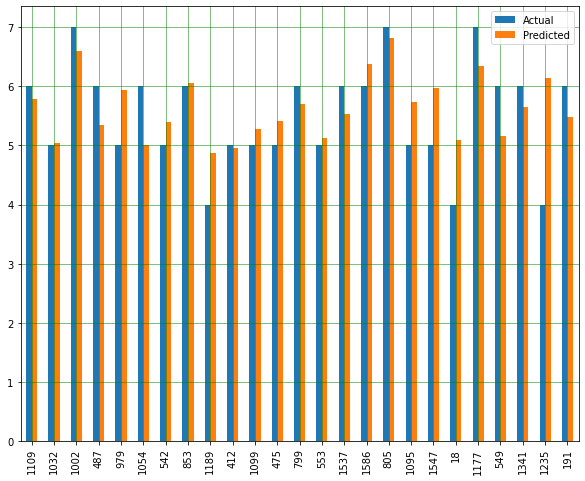

In [0]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Our model has returned pretty good prediction results

In [0]:
#X_test[['density']]
X_test_density=X_test[['density']]
print(X_test_density)

X_test_chlorides=X_test[['chlorides']]
print(X_test_chlorides)


      density
1109  0.99820
1032  0.99854
1002  0.99516
487   0.99820
979   0.99690
...       ...
794   0.99531
813   0.99462
1322  0.99392
704   0.99800
1023  0.99506

[320 rows x 1 columns]
      chlorides
1109      0.171
1032      0.095
1002      0.063
487       0.053
979       0.075
...         ...
794       0.065
813       0.102
1322      0.058
704       0.078
1023      0.098

[320 rows x 1 columns]


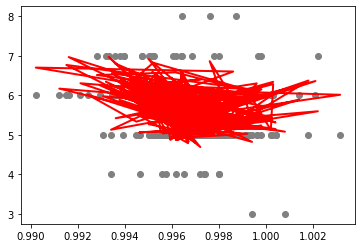

In [0]:
#Now lets plot straight line with Test data with effective coefficents
#ets plot for testing data of X_test_density
plt.scatter(X_test_density, y_test,  color='gray')
plt.plot(X_test_density, y_pred, color='red', linewidth=2)
plt.show()

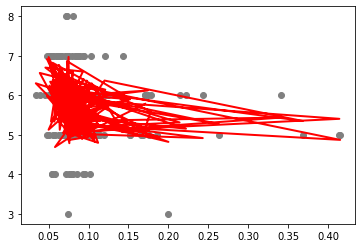

In [0]:
#Now lets plot straight line with Test data with effective coefficents
#ets plot for testing data of X_test_chlorides
plt.scatter(X_test_chlorides, y_test,  color='gray')
plt.plot(X_test_chlorides, y_pred, color='red', linewidth=2)
plt.show()

# Evaluate the model: Performance of Algorithm

The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors. It is calculated as:
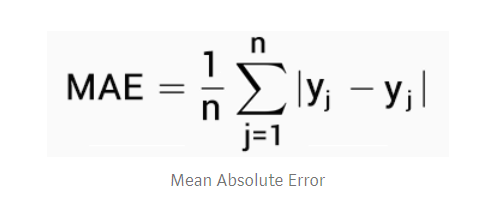

2. Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:

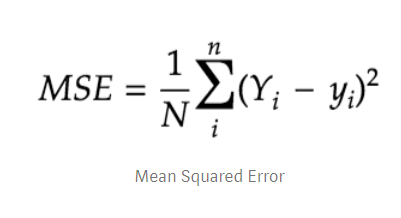

3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

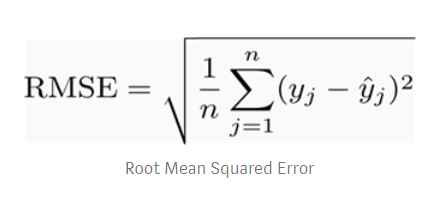


Luckily, we don’t have to perform these calculations manually. The Scikit-Learn library comes with pre-built functions that can be used to find out these values for us.
Let’s find the values for these metrics using our test data

In [17]:
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared Value (r2):', r2_score(y_test,y_pred))

Mean Absolute Error: 0.46963309286616983
Mean Squared Error: 0.384471197820056
Root Mean Squared Error: 0.6200574149383716
R-Squared Value (r2): 0.32838876395814165


You can see that the value of root mean squared error is 0.62, which is slightly greater than 10% of the mean value which is 5.63. This means that our algorithm was not very accurate but can still make reasonably good predictions.
There are many factors that may have contributed to this inaccuracy, for example :

Need more data: We need to have a huge amount of data to get the best possible prediction.

Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.

Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.

**Backward Elimination**

Backward elimination (or backward deletion) is the reverse process. All the independent variables are entered into the equation first and each one is deleted one at a time if they do not contribute to the regression equation. Stepwise selection is considered a variation of the previous two methods.

It is a method of fitting regression models in which the choice of predictive variables is carried out by an automatic procedure. It involves starting with all candidate variables, testing the deletion of each variable using a chosen model fit criterion, deleting the variable (if any) whose loss gives the most statistically insignificant deterioration of the model fit, and repeating this process until no further variables can be deleted without a statistically insignificant loss of fit.

In [18]:
# Building the optimal model using Backward Elimination
#import statsmodels.formula.api as sm
import statsmodels.api as sm
X = np.append(arr = np.ones((1599, 1)).astype(int), values = X, axis = 1)
print(X)
X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()


[[ 1.     7.4    0.7   ...  3.51   0.56   9.4  ]
 [ 1.     7.8    0.88  ...  3.2    0.68   9.8  ]
 [ 1.     7.8    0.76  ...  3.26   0.65   9.8  ]
 ...
 [ 1.     6.3    0.51  ...  3.42   0.75  11.   ]
 [ 1.     5.9    0.645 ...  3.57   0.71  10.2  ]
 [ 1.     6.     0.31  ...  3.39   0.66  11.   ]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     73.61
Date:                Sat, 06 Jun 2020   Prob (F-statistic):          7.94e-124
Time:                        03:46:43   Log-Likelihood:                -1622.1
No. Observations:                1599   AIC:                             3266.
Df Residuals:                    1588   BIC:                             3325.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        189.6787     14.266     13.295      0.000     161.696     217.662
x1             0.1720      0.023      7.643      0.000       0.128       0.216
x2            -0.9839      0.125     -7.887      0.000      -1.229      -0.739
x3             0.0469      0.150      0.312      0.755      -0.248       0.342
x4             0.0949      0.013      7.077      0.000       0.069       0.121
x5            -2.2780      0.431     -5.280      0.000      -3.124      -1.432
x6             0.0038      0.002      1.681      0.093      -0.001       0.008
x7            -0.0039      0.001     -5.195      0.000      -0.005      -0.002
x8          -188.4014     14.638    -12.871      0.000    -217.113    -159.690
x9             0.6255      0.169      3.699      0.000       0.294       0.957
x10            1.2607      0.113     11.145      0.000       1.039       1.483
==============================================================================
Omnibus:                       29.835   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.661
Skew:                          -0.152   Prob(JB):                     2.71e-11
Kurtosis:                       3.799   Cond. No.                     7.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
X_opt = X[:, 7]
print(X_opt)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

[34. 67. 54. ... 40. 44. 42.]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.629
Model:                            OLS   Adj. R-squared (uncentered):              0.628
Method:                 Least Squares   F-statistic:                              2705.
Date:                Sun, 31 May 2020   Prob (F-statistic):                        0.00
Time:                        04:49:30   Log-Likelihood:                         -4258.1
No. Observations:                1599   AIC:                                      8518.
Df Residuals:                    1598   BIC:                                      8524.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0793      0.002     52.009      0.000       0.076       0.082
==============================================================================
Omnibus:                      328.034   Durbin-Watson:                   1.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              658.305
Skew:                          -1.198   Prob(JB):                    1.12e-143
Kurtosis:                       5.036   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
X_opt = X[:, [5,8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          3.941e+04
Date:                Sun, 31 May 2020   Prob (F-statistic):                        0.00
Time:                        04:49:39   Log-Likelihood:                         -1916.7
No. Observations:                1599   AIC:                                      3837.
Df Residuals:                    1597   BIC:                                      3848.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.2491      0.427     -5.267      0.000      -3.087      -1.412
x2             5.8515      0.043    137.529      0.000       5.768       5.935
==============================================================================
Omnibus:                       14.420   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.966
Skew:                           0.203   Prob(JB):                     0.000563
Kurtosis:                       3.246   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now that we found R squared is close to 1 means it can be a better model,, Select these two features and perform the prediction and find the RMSE

In [0]:
X_opt = X[:, 8]
print(X_opt)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

[0.9978  0.9968  0.997   ... 0.99574 0.99547 0.99549]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          7.750e+04
Date:                Sun, 31 May 2020   Prob (F-statistic):                        0.00
Time:                        04:49:47   Log-Likelihood:                         -1930.5
No. Observations:                1599   AIC:                                      3863.
Df Residuals:                    1598   BIC:                                      3868.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.6541      0.020    278.392      0.000       5.614       5.694
==============================================================================
Omnibus:                       17.676   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.705
Skew:                           0.222   Prob(JB):                     8.67e-05
Kurtosis:                       3.290   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
X_opt = X[:, 5]
print(X_opt)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

[0.076 0.098 0.092 ... 0.076 0.075 0.067]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.745
Model:                            OLS   Adj. R-squared (uncentered):              0.745
Method:                 Least Squares   F-statistic:                              4668.
Date:                Sun, 31 May 2020   Prob (F-statistic):                        0.00
Time:                        04:50:05   Log-Likelihood:                         -3957.7
No. Observations:                1599   AIC:                                      7917.
Df Residuals:                    1598   BIC:                                      7923.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            49.4788      0.724     68.320      0.000      48.058      50.899
==============================================================================
Omnibus:                     1548.118   Durbin-Watson:                   1.443
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73339.635
Skew:                          -4.588   Prob(JB):                         0.00
Kurtosis:                      34.884   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Perform the Model Prediction considering the features of indexes 5 and 8

In [0]:
X_new = X[:, 8].reshape(-1,1)
#y_new = dataset.iloc[:,-1].values
y_new=y.values.reshape(-1,1)
print(X_new)
print(X_new.shape)
print(y_new)
print(y_new.shape)
X1= dataset[['chlorides', 'density']]
y1= dataset['quality']
print(X1, y1)
#print(y1)

[[0.9978 ]
 [0.9968 ]
 [0.997  ]
 ...
 [0.99574]
 [0.99547]
 [0.99549]]
(1599, 1)
[[5]
 [5]
 [5]
 ...
 [6]
 [5]
 [6]]
(1599, 1)
      chlorides  density
0         0.076  0.99780
1         0.098  0.99680
2         0.092  0.99700
3         0.075  0.99800
4         0.076  0.99780
...         ...      ...
1594      0.090  0.99490
1595      0.062  0.99512
1596      0.076  0.99574
1597      0.075  0.99547
1598      0.067  0.99549

[1599 rows x 2 columns] 0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


In [0]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_new, y_new, test_size=0.2, random_state=0)
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(1279, 1)
(320, 1)
(1279, 1)
(320, 1)


In [0]:
print(X2_train)

[[0.9991 ]
 [0.9972 ]
 [0.9971 ]
 ...
 [0.99677]
 [1.0021 ]
 [0.998  ]]


In [0]:
regressor = LinearRegression()  
regressor.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y2_pred = regressor.predict(X2_test)
print(y2_pred)

[[5.53984122]
 [5.51467895]
 [5.76482155]
 [5.53984122]
 [5.63604991]
 [5.5938661 ]
 [5.65825192]
 [5.66417246]
 [5.69081486]
 [5.65825192]
 [5.65381152]
 [5.49543721]
 [5.50283788]
 [5.89507332]
 [5.78850369]
 [5.78258315]
 [5.88323225]
 [5.57536443]
 [5.92023559]
 [5.59904657]
 [5.91135479]
 [5.5916459 ]
 [5.74854008]
 [5.7233778 ]
 [5.59904657]
 [5.73225861]
 [5.57018396]
 [5.76186128]
 [5.62864925]
 [5.99128201]
 [5.5694439 ]
 [5.56204323]
 [5.76038115]
 [5.57684457]
 [5.76186128]
 [5.42143052]
 [5.63604991]
 [5.50283788]
 [5.87879185]
 [5.76630168]
 [5.55464256]
 [5.64049032]
 [6.13189471]
 [5.51023855]
 [5.72485794]
 [5.65233139]
 [5.80774543]
 [5.67305326]
 [5.61384791]
 [5.77592255]
 [5.71745727]
 [5.72485794]
 [5.53688096]
 [5.25121515]
 [5.49543721]
 [5.77666262]
 [5.66195226]
 [5.59904657]
 [5.67453339]
 [5.57758463]
 [5.52133955]
 [5.67305326]
 [5.82254676]
 [5.73225861]
 [5.5694439 ]
 [5.81810636]
 [5.74261954]
 [5.17350813]
 [5.62864925]
 [5.39182785]
 [5.50653821]
 [5.63

In [0]:
df2 = pd.DataFrame({'Actual': y2_test[0], 'Predicted': y2_pred[0]})
df3 = df2.head(25)
df3

,Actual,Predicted
0,6,5.539841


In [0]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))
print('R-Squared Value (r2):', r2_score(y2_test,y2_pred))

Mean Absolute Error: 0.612323031665244
Mean Squared Error: 0.5532199885949156
Root Mean Squared Error: 0.743787596424487
R-Squared Value (r2): 0.033610937698407395


# References

https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

https://www.w3schools.com/python/python_ml_multiple_regression.asp